Schmidt, Jan Olaf
I6079633

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as ms
from sklearn import model_selection, metrics  #to include metrics for evaluation # this used to be cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Master_AI/DataMining/Labs/Resit_Lab/churn-train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Master_AI/DataMining/Labs/Resit_Lab/churn-test.csv')
base_df = pd.read_csv('/content/drive/MyDrive/Master_AI/DataMining/Labs/Resit_Lab/churn-train.csv')

# Pre-processing

The dataset as loaded is not usable out of the box. One colum lags commpletness and most others are non numerical values. To used the data nurmerical values are needed.

The following function cleans the dataframe and transforms all non numerical objects into an int variable.

'TotalCharges' will be removed as there are missing cells and there is an expected correlation with 'MonthlyCharges' (or better with 'MonthlyCharges' + 'Contract')


In [ ]:
def clean_df(data):
  data['gender'].replace(['Male','Female'],[0,1],inplace=True)
  data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
  data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
  data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
  data['MultipleLines'].replace(["'No phone service'",'No', 'Yes'],[0,0,1],inplace=True)
  data['InternetService'].replace(['No','DSL',"'Fiber optic'"],[0,1,2],inplace=True)
  data['OnlineSecurity'].replace(['No','Yes',"'No internet service'"],[0,1,0],inplace=True)
  data['OnlineBackup'].replace(['No','Yes',"'No internet service'"],[0,1,0],inplace=True)
  data['DeviceProtection'].replace(['No','Yes',"'No internet service'"],[0,1,0],inplace=True)
  data['TechSupport'].replace(['No','Yes',"'No internet service'"],[0,1,0],inplace=True)
  data['StreamingTV'].replace(['No','Yes',"'No internet service'"],[0,1,0],inplace=True)
  data['StreamingMovies'].replace(['No','Yes',"'No internet service'"],[0,1,0],inplace=True)
  data['Contract'].replace(['Month-to-month', "'One year'","'Two year'"],[0,1,2],inplace=True)
  data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
  data['PaymentMethod'].replace(["'Electronic check'", "'Mailed check'", "'Bank transfer (automatic)'","'Credit card (automatic)'"],[0,1,2,3],inplace=True)
  data.pop('TotalCharges')
  #data['TotalCharges'].replace("?",0.0,inplace=True)
  #data['TotalCharges'] = data['TotalCharges'].astype(float, errors = 'raise')
  data['Churn'].replace(['Yes','No'],[1,0],inplace=True)
  return

Here it show the dataframe element before the tranformation:

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4695 non-null   object 
 1   SeniorCitizen     4695 non-null   int64  
 2   Partner           4695 non-null   object 
 3   Dependents        4695 non-null   object 
 4   tenure            4695 non-null   int64  
 5   PhoneService      4695 non-null   object 
 6   MultipleLines     4695 non-null   object 
 7   InternetService   4695 non-null   object 
 8   OnlineSecurity    4695 non-null   object 
 9   OnlineBackup      4695 non-null   object 
 10  DeviceProtection  4695 non-null   object 
 11  TechSupport       4695 non-null   object 
 12  StreamingTV       4695 non-null   object 
 13  StreamingMovies   4695 non-null   object 
 14  Contract          4695 non-null   object 
 15  PaperlessBilling  4695 non-null   object 
 16  PaymentMethod     4695 non-null   object 


Here it show the dataframe element after the tranformation:

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4695 non-null   int64  
 1   SeniorCitizen     4695 non-null   int64  
 2   Partner           4695 non-null   int64  
 3   Dependents        4695 non-null   int64  
 4   tenure            4695 non-null   int64  
 5   PhoneService      4695 non-null   int64  
 6   MultipleLines     4695 non-null   int64  
 7   InternetService   4695 non-null   int64  
 8   OnlineSecurity    4695 non-null   int64  
 9   OnlineBackup      4695 non-null   int64  
 10  DeviceProtection  4695 non-null   int64  
 11  TechSupport       4695 non-null   int64  
 12  StreamingTV       4695 non-null   int64  
 13  StreamingMovies   4695 non-null   int64  
 14  Contract          4695 non-null   int64  
 15  PaperlessBilling  4695 non-null   int64  
 16  PaymentMethod     4695 non-null   int64  


In [ ]:
train_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,61,0,0,1,1,0,1,0,0,0,0,0,2,33.60,2117.20,0
1,0,0,1,1,72,1,1,2,0,1,1,1,0,0,2,0,2,90.45,6565.85,0
2,1,0,0,0,5,1,1,2,0,0,0,0,1,0,0,1,0,84.00,424.75,0
3,1,0,0,0,49,1,0,1,1,1,1,1,0,0,2,0,2,67.40,3306.85,0
4,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,1,2,19.70,168.90,0


# Models

In [ ]:
def LogReg(X_train,y_train):
  lr_model = LogisticRegression(max_iter=100, solver='liblinear')
  lr_model.fit(X_train, y_train);
  return lr_model

def RngFor(X_train,y_train):
  params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
  rf_model = RandomForestClassifier(**params)
  rf_model.fit(X_train, y_train)
  return rf_model

def GrdBos(X_train,y_train):
  gb_model = GradientBoostingClassifier()
  gb_model.fit(X_train, y_train)
  return gb_model

# Part 1 Description

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Master_AI/DataMining/Labs/Resit_Lab/churn-train.csv')
clean_df(train_df)

#Prepair data for training
y = train_df["Churn"].to_numpy()
X = train_df.drop(labels = ["Churn"],axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [ ]:
lr_model = LogReg(X_train,y_train)
rf_model = RngFor(X_train,y_train)
gb_model = GrdBos(X_train,y_train)

In [ ]:
# Logistic Regression Accuracy
lr_pred_val = lr_model.predict(X_val)
lr_pred_acc = metrics.accuracy_score(y_val, lr_pred_val)
print('Logistic Regression Accuracy: {}'.format(lr_pred_acc))

# Random Forest Accuracy
rf_pred_val = rf_model.predict(X_val)
rf_pred_acc = metrics.accuracy_score(y_val, rf_pred_val)
print('Random Forest Accuracy:       {}'.format(rf_pred_acc))

# Gradient Boosting Accuracyt
gb_pred_val = gb_model.predict(X_val)
gb_pred_acc = metrics.accuracy_score(y_val, gb_pred_val)
print('Gradient Boosting Accuracyt:  {}'.format(gb_pred_acc))

Logistic Regression Accuracy: 0.8210862619808307
Random Forest Accuracy:       0.8210862619808307
Gradient Boosting Accuracyt:  0.820021299254526


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

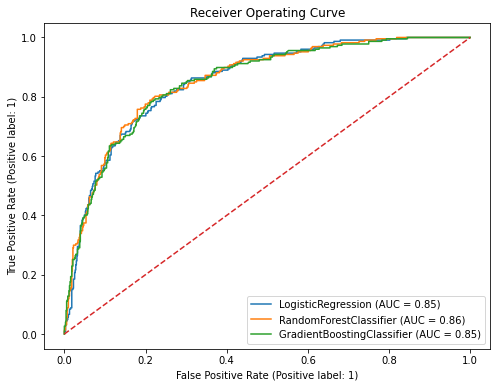

In [ ]:
# ROC Curve
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Receiver Operating Curve')
plot = metrics.plot_roc_curve(lr_model, X_val, y_val, ax=ax);
plot = metrics.plot_roc_curve(rf_model, X_val, y_val, ax=ax);
plot = metrics.plot_roc_curve(gb_model, X_val, y_val, ax=ax);
ax.plot([0,1], [0,1], '--');

based on the logistic regression model the most important features are


1.   PhoneService          
2.   InternetService     
3.   Contract    
4.   OnlineSecurity   
5.   SeniorCitizen   
6.   PaperlessBilling        

this can minimaly change per training run. 



In [ ]:
# Print the Regressions Coefficiens
weights = pd.Series(model_.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

InternetService     0.612365
SeniorCitizen       0.432168
PaperlessBilling    0.349426
MultipleLines       0.248708
StreamingTV         0.221690
StreamingMovies     0.099447
gender              0.073217
MonthlyCharges      0.010435
tenure             -0.035458
DeviceProtection   -0.047582
Partner            -0.059291
PaymentMethod      -0.087788
TechSupport        -0.116181
Dependents         -0.145086
OnlineBackup       -0.272240
OnlineSecurity     -0.493722
Contract           -0.570623
PhoneService       -0.684167
dtype: float64

For the Random Forest and Gradient Boosting model the most important features are


1.   Contract          
2.   tenure     
3.   MonthlyCharges
4.   InternetService    
5.   Payment Method   
6.   SeniorCitizen       

this can minimaly change per training run. 

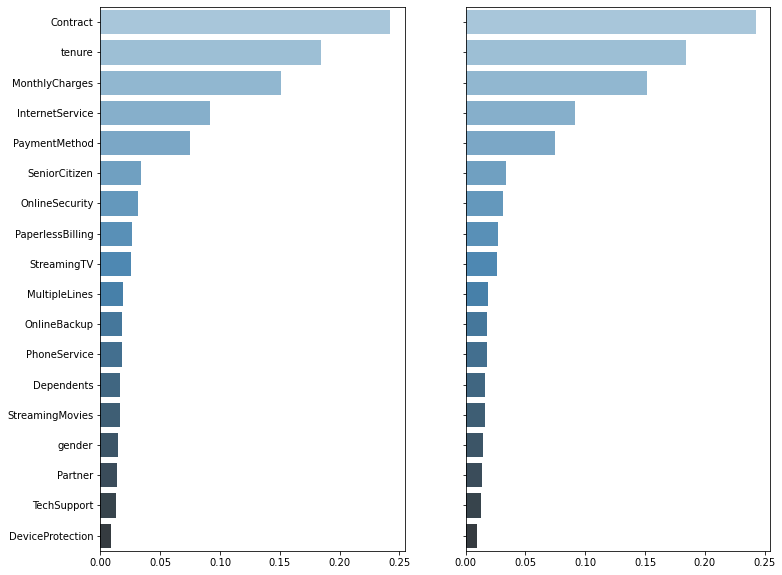

In [ ]:
# Plot features importances
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 10)) 

imp2 = pd.Series(data=rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
imp3 = pd.Series(data=gb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(y=imp2.index, x=imp.values, palette="Blues_d", orient='h', ax=axes[0])
sns.barplot(y=imp3.index, x=imp.values, palette="Blues_d", orient='h', ax=axes[1])

As such a deeper look into these features is advanages:

1.   Contract        
2.   PhoneService          
3.   InternetService     
4.   tenure  
5.   MonthlyCharges *(hard to plot | intuitonal that should be right)*
6.   Payment Method 
7.   PaperlessBilling      
8.   OnlineSecurity   
9.   SeniorCitizen    

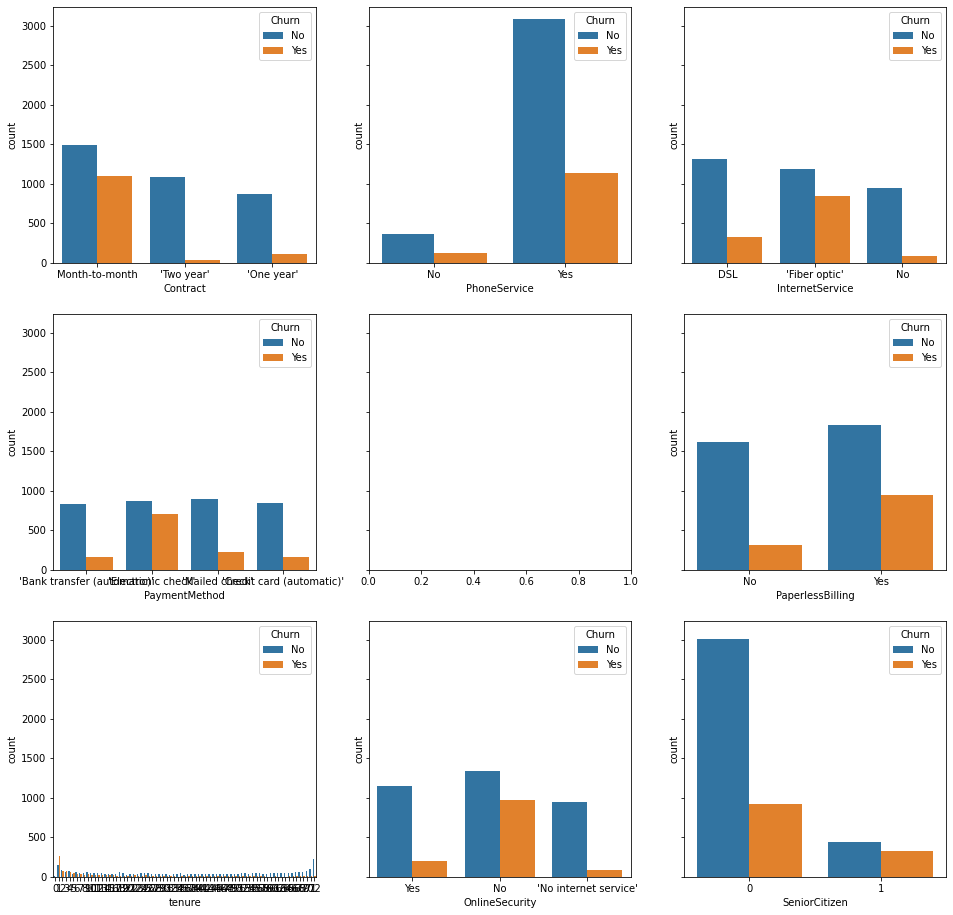

In [ ]:
_, axes = plt.subplots(3, 3, sharey=True, figsize=(16, 16)) 
sns.countplot(x='Contract', hue='Churn',
              data=base_df, ax=axes[0,0]);
sns.countplot(x='PhoneService', hue='Churn',
              data=base_df, ax=axes[0,1]);
sns.countplot(x='InternetService', hue='Churn',
              data=base_df, ax=axes[0,2]);

sns.countplot(x='PaymentMethod', hue='Churn',
              data=base_df, ax=axes[1,0]);
#sns.lineplot(x='MonthlyCharges', hue='Churn',
#              data=base_df, ax=axes[1,1]);
sns.countplot(x='PaperlessBilling', hue='Churn',
              data=base_df, ax=axes[1,2]);

sns.countplot(x='tenure', hue='Churn',
              data=base_df, ax=axes[2,0]);
sns.countplot(x='OnlineSecurity', hue='Churn',
              data=base_df, ax=axes[2,1]);
sns.countplot(x='SeniorCitizen', hue='Churn',
              data=base_df, ax=axes[2,2]);


In each of the plot outlier can be seen. These show their potantional worth for the prediciton.

*It has to be mentioned that there are far more non-churn than churn cases, which has to be considerd wen looking into the plots.*

Churn
0    0.733333
1    0.266667
dtype: float64


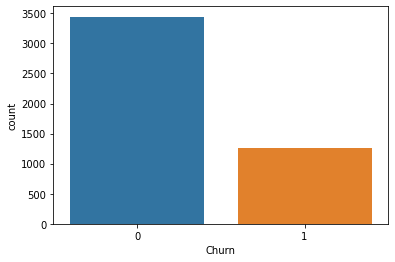

In [ ]:
sns.countplot(x='Churn', data=train_df);
print(train_df.groupby('Churn').size()/len(train_df))

Based on the most defining features given by the models and looking into the plots gives us possible desciption of loyal and risky customers:


Loyal:

*   Long Contract means more loyal
*   Usage of Phone Service
*   Internet Sevices have no sign of loyal customers
*   Being old is a sign of loyality (or lazyness in change)

**In sum**: Old Citisen with a 2 year contact and a classic service (telefone but no internet) are the most loyal ones. People who are fine with the status-quo


Churn Risk:

*   Short Contacts have a high chance of a churn (because it is easier | can be error by the timeframe if it is only measured on a short ime period)
*   Users of Fiber optics show a high churn risk (maybe to high expectations)
*   Using a check as payment shows a high churn potential 
* having no Security Package increases the churn risk

**In sum**: Persons with a month to month contract and a fiber connetiction are most likly th churn. Basicly more critical persons.


# Part 2 Prediction

For the prediction I used the Linear Regression Model as all models have shon very similar performance so far.

The ROC Curve is very similar on the test data as it was on the validation data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


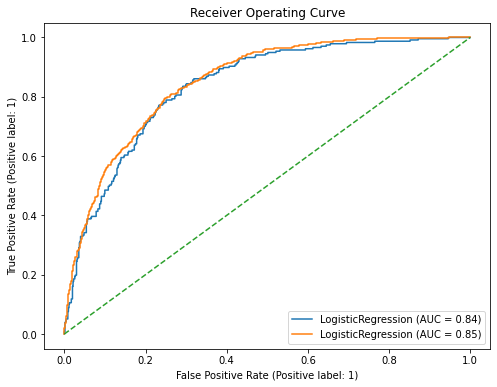

In [ ]:
# ROC Curve
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Receiver Operating Curve')
plot = metrics.plot_roc_curve(model_, X_val, y_val, ax=ax);
plot = metrics.plot_roc_curve(model_, X_test, y_test, ax=ax);
ax.plot([0,1], [0,1], '--');

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Master_AI/DataMining/Labs/Resit_Lab/churn-test.csv')
clean_df(test_df)

y_test = test_df["Churn"].to_numpy()
X_test = test_df.drop(labels = ["Churn"],axis = 1)

In [ ]:
# predictions
prediction_test = lr_model.predict(X_test)
prediction_probas = lr_model.predict_proba(X_test)[:,1]

Potentional income improvment over the entire test set

In [ ]:
individual_cost_gift = 10.0
individual_cost_churn = 64.0

cost_gift = 0.0
cost_churn = 0.0
cost_all_churn = 0.0

for i in range(len(prediction_test)):
  if(y_test[i] == 1):
    cost_gift += individual_cost_gift
  if(prediction_test[i] == 1):
    cost_all_churn += individual_cost_churn
  if(y_test[i] == 0 and prediction_test[i] == 1):
    cost_churn += individual_cost_churn

estimatet_cost = cost_gift + cost_churn
print(estimatet_cost)
print('--------')
print(cost_all_churn)
print('========')
print(cost_all_churn - estimatet_cost)

17178.0
--------
32192.0
15014.0


Selecting 300 positive sample and calculate the income improvment

In [ ]:
individual_cost_gift = 10.0
individual_cost_churn = 64.0

cost_gift = 0.0
cost_churn = 0.0
cost_all_churn = 0.0

for i in range(len(prediction_test)):
  if(y_test[i] == 1):
    cost_gift += individual_cost_gift
    if(prediction_test[i] == 1):
      cost_all_churn += individual_cost_churn
    if(y_test[i] == 0 and prediction_test[i] == 1):
      cost_churn += individual_cost_churn

estimatet_cost = cost_gift + cost_churn
print(estimatet_cost)
print('--------')
print(cost_all_churn)
print('========')
print(cost_all_churn - estimatet_cost)

6170.0
--------
21440.0
15270.0


Using this Model for Churn prediction and using it for conter masurements on 300 detected customers gives us a high monitary improvement